t = 0.10: error = 1.42e-14
t = 0.20: error = 1.87e-14
t = 0.30: error = 2.18e-14
t = 0.40: error = 2.26e-14
t = 0.50: error = 2.4e-14
t = 0.60: error = 2.49e-14
t = 0.70: error = 2.58e-14
t = 0.80: error = 2.66e-14
t = 0.90: error = 2.75e-14
t = 1.00: error = 2.89e-14
t = 1.10: error = 3.06e-14
t = 1.20: error = 3.11e-14
t = 1.30: error = 3.2e-14
t = 1.40: error = 3.38e-14
t = 1.50: error = 3.38e-14
t = 1.60: error = 3.55e-14
t = 1.70: error = 3.55e-14
t = 1.80: error = 3.82e-14
t = 1.90: error = 3.73e-14
t = 2.00: error = 3.91e-14
t = 2.10: error = 4.17e-14
t = 2.20: error = 4.26e-14
t = 2.30: error = 4.17e-14
t = 2.40: error = 4.26e-14
t = 2.50: error = 4.35e-14
t = 2.60: error = 4.53e-14
t = 2.70: error = 4.62e-14
t = 2.80: error = 4.71e-14
t = 2.90: error = 4.8e-14
t = 3.00: error = 5.06e-14
t = 3.10: error = 4.97e-14
t = 3.20: error = 5.15e-14
t = 3.30: error = 5.24e-14
t = 3.40: error = 5.42e-14
t = 3.50: error = 5.51e-14
t = 3.60: error = 5.6e-14
t = 3.70: error = 5.77e-14
t = 3

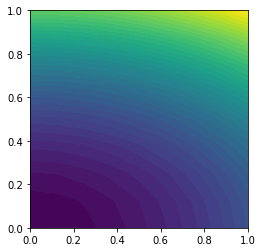

In [2]:
from fenics import *
import numpy as np

T = 6.0            # final time
 # number of time steps
dt = 0.1 # time step size
num_steps = np.int(T/dt)

alpha = 3          # parameter alpha
beta = 1.2         # parameter beta
degree = 2
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', degree)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=degree+1, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

save_u = File('heatResults/Galerk_u.pvd') 

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)
    u.rename('u','u')
    if n % 10 == 0:
        save_u << (u, float(t))
    # Plot solution
    plot(u)

    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)
